In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('SNA.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.shape

(400, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Purchased', ylabel='count'>

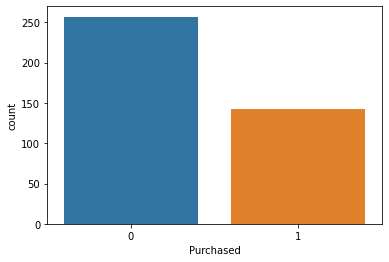

In [8]:
sns.countplot(x='Purchased',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

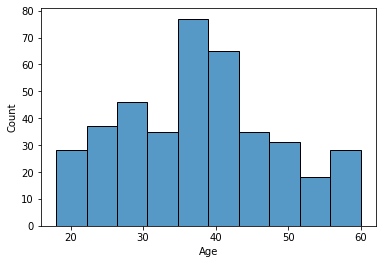

In [11]:
sns.histplot(x='Age',data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

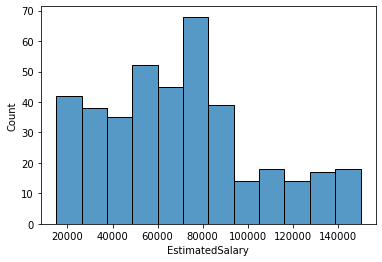

In [15]:
sns.histplot(x='EstimatedSalary',data=df)

In [16]:
# divide dataset into dependent and independent varriable
X = df.iloc[:,[0,1]]
Y = df.iloc[:,-1]

In [17]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [19]:
# Splitting the dataset into Traning and Test data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=4)

In [20]:
print('Traning data : ',X_train.shape)
print('Testing data : ',X_test.shape)

Traning data :  (268, 2)
Testing data :  (132, 2)


In [21]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply Support Vector Machine 

In [22]:
# 1} Using Linear kernal

from sklearn.svm import SVC

classifier = SVC(kernel='linear',random_state =4)
classifier.fit(X_train, Y_train)

# Predicting the test set results
Y_pred = classifier.predict(X_test)

In [23]:
Y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,Y_pred)

array([[84,  5],
       [12, 31]], dtype=int64)

In [26]:
(84+31)/(12+5+84+31)

0.8712121212121212

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)

0.8712121212121212

In [28]:
# 2} Using radial bassis function (rbf) kernal

from sklearn.svm import SVC

classifier = SVC(kernel='rbf',random_state =4)
classifier.fit(X_train, Y_train)

# Predicting the test set results
Y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)

0.9090909090909091

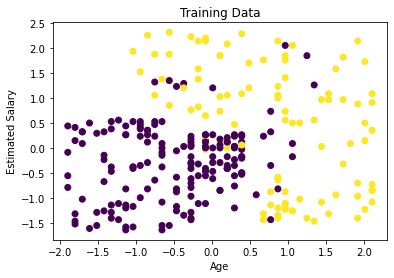

In [34]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

In [ ]:
# purple 0
# yellow 1

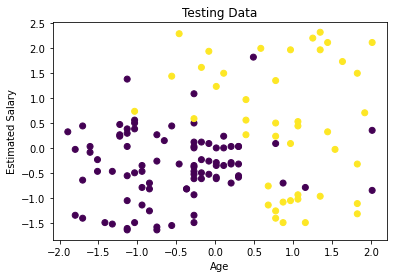

In [38]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Testing Data')
plt.show()

In [36]:
# 1} Using Linear kernal

from sklearn.svm import SVC

classifier = SVC(kernel='linear',random_state =4)
classifier.fit(X_train, Y_train)

# Predicting the test set results
Y_pred = classifier.predict(X_test)

# Using rbf kernal we get more accurate results than using linear

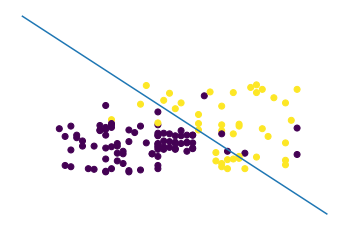

In [37]:
# plot data points 
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test)

# create the hyperplane
w =classifier.coef_[0]
a =-w[0] / w[1]
xx = np.linspace(-2.5,2.5) 
yy = a * xx - (classifier.intercept_[0] )/ w[1]

# plot the hyperplane
plt.plot(xx, yy)
plt.axis('off')
plt.show()